In [4]:
import csv
import pandas as pd
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd()
# print(f"Working dir: {cwd}")
module_path = os.path.abspath(Path(cwd).parents[2])
# print(f"Module path: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
import seaborn as sns
sns.set_theme(style="darkgrid")

In [204]:
def put_together(f):
    with open(os.path.join(module_path, "experiments", "exp07-archv", "oob_0_" + str(f) +".csv", newline='')) as csvfile: 
        r = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(r):
            if  i==0:
                xs = row[1]
            if i ==2:
                ys = row[1]
                
    xs = xs.strip("[]")
    xs = xs.strip("()")
    xs  = xs.split(",")
    xs = list(map(int, xs))
    
    ys = ys.strip("[]")
    ys = ys.strip("()")
    ys  = ys.split(",")
    ys = list(map(float, ys))

    df = pd.DataFrame(data=
                {'xs': xs,
                'ys1': ys,
                }
                     )
    return df

In [212]:
df1 =  put_together(1)

In [213]:
df2 =  put_together(2)

In [224]:
df3 =  put_together(3)
df4 =  put_together(4)
df5 =  put_together(5)
df6 =  put_together(6)
df7 =  put_together(7)
df8 =  put_together(8)
df9 =  put_together(9)
df10 =  put_together(10)

In [225]:
new=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=0)

In [226]:
new.reset_index(inplace=True)

In [227]:
new

,index,xs,ys1
0,0,10,0.075462
1,1,15,0.065915
2,2,20,0.064996
3,3,25,0.064884
4,4,30,0.064085
...,...,...,...
1985,194,980,0.062631
1986,195,985,0.062649
1987,196,990,0.062664
1988,197,995,0.062651


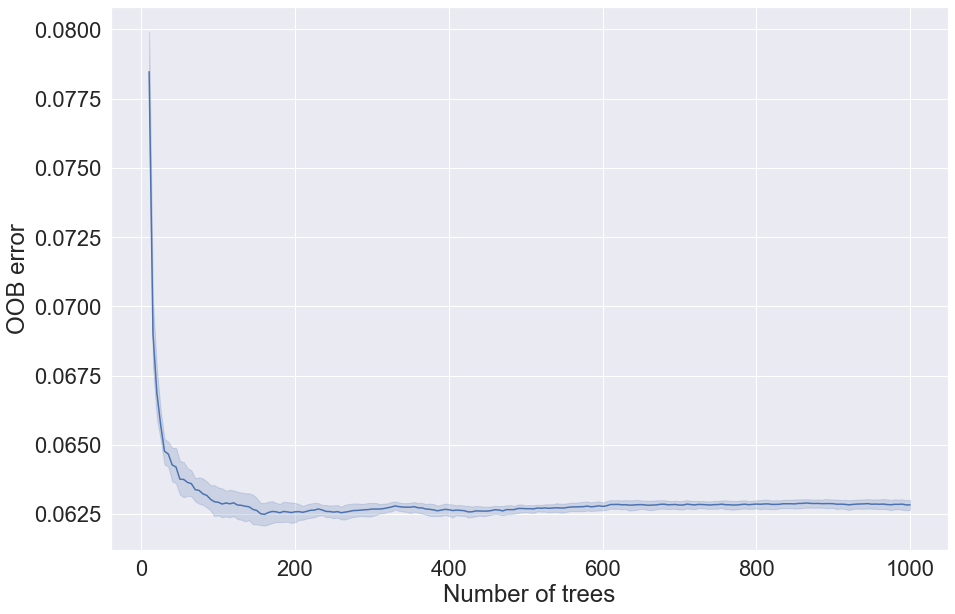

In [240]:
plt.gcf().set_size_inches(15, 10)
p = sns.lineplot(x="xs", y="ys1",
             #style="event",
             data=new)
sns.set(font_scale = 3)
p.set_ylabel("OOB error")
p.set_xlabel("Number of trees")
plt.savefig(os.path.join(module_path, "reports", "figures", "apoc", "oob_rate_dependence_on_nr_of_trees.png", bbox_inches='tight')